# Forventningsverdi, den store tall lov og fordelinger

I denne notatboka skal vi se igjen på forventningsverdi, standard avvikk og utforske den så kallte store talls lov.

#### Innhold:
* [Forventningsverdi](#sec1_forv)
* [Den store talls lov](#sec2_stl)
* [Standard avvik](#sec3_stdev)

## Forventningsverdi <a class="anchor" id="sec1_forv"></a>

Vi har lært om forventningsverdier av tilfeldige variabler. Som repetisjon la oss se på det igjen:

#### Definisjon forventningsverdi

Hvis $X$ er en tilfeldig variabel med endelig mange mulige verdier $v_1 , \ldots , v_N, N \in \mathbb{N}$.
Så er forventningsverdien til $X$ gitt som 

$$\mathbb{E}(X) = v_1 P(X=v_1) + v_2 P(X=v_2) + \cdots + v_N P(X=v_N) = \sum_{k=1}^N v_k P(X=k).$$

##### Egenskaper til forventningsverdien

Hvi $X,Y$ er tilfeldige variabler og $a$ er ett tall så gjelder 
$$\mathbb{E} (X+Y) = \mathbb{E} (X) + \mathbb{E}(Y) , \quad \mathbb{E}(aX) = a \mathbb{E}(X).$$
Vi sier at **forventningsverdien er linear**.

Forventningsverdien tolkes som den verdien gjennomsnitten av den tilfeldige variablen tilnærmerer seg etter mange forsøk:

Text(0.5, 1.0, 'Løpende gjennomsnitt av gevinst (eller tap) over 1000 myntspill')

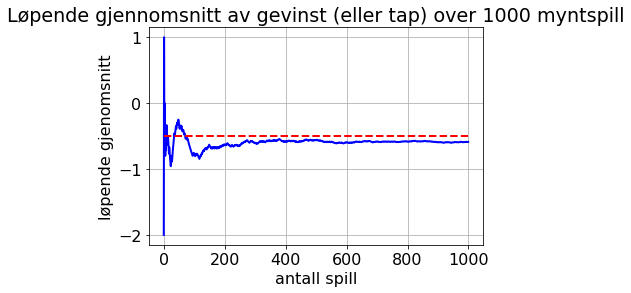

In [2]:
#Simulasjon av et myntspill hvor vi knipser et fair mynt og får 1 kron når vi knipser mynt og må betale 2 kron når 
#kron dukker opp

#Importer pakker og sett opp alt for plotting...
import random
%matplotlib inline 
from numpy import *               
from matplotlib.pyplot import *   
newparams = {'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 16}
rcParams.update(newparams)

#Den tilfeldige variablen defineres nå
def G ():
    if random.random() <=0.5:
        return(-2)
    else:
        return(1)
lgjen = [G()]     #Løpende gjennomsnitt
for i in range(1,1000):
    lgjen.append((G()+(i-1)*lgjen[i-1])/i)
x=range(1000) 
forvented = [-0.5]*(1000)     #Forventningsverdi: Sjekk at det er virklig ^-0.5
plot(x, lgjen, 'b-')
plot(x,forvented, 'r--')
xlabel('antall spill')
ylabel('løpende gjenomsnitt')
title('Løpende gjennomsnitt av gevinst (eller tap) over 1000 myntspill')

Text(0.5, 1.0, 'Løpende gjennomsnitt av gevinst (eller tap) over 1000 myntspill, 2 myntkast')

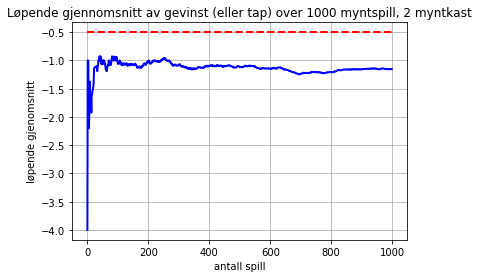

In [22]:
def H ():
    if random.random() <=0.5:
        return(-2)
    else:
        return(1)
lgjen_2=[]
lgjen_2 = [G()+H()]     #Løpende gjennomsnitt
n=1000
for i in range(1,n):
    lgjen_2.append((G()+H()+(i-1)*lgjen_2[i-1])/i)
x=range(n) 
forvented = [-0.5]*(n)     #Forventningsverdi: Sjekk at det er virklig ^-0.5
plot(x, lgjen_2, 'b-')
plot(x,forvented, 'r--')
xlabel('antall spill')
ylabel('løpende gjenomsnitt')
title('Løpende gjennomsnitt av gevinst (eller tap) over 1000 myntspill, 2 myntkast')

### Forventningsverdi til en binomisk fordelt variabel

Vi skal se på et tilfeldig forsøk som har to utfall (f.eks. myntkast hvor vi tolker en utfall som suksess og den andre som tap). Som vi har lært kan vi beskrive den situasjonen med binomisk fordeling. 

Hvis sannsynlighet for å får suksess er $p$ er sannsynligheten for den motsatte hendelse $1-p$. Vi er interessert i forventningsverdi til en tilfeldig variabel $X$ som modellerer et binomisk forsøk med $n$ steg. Husk at sannsynlighet for å få akkurat $k$suksess ved $n$ forsøk er gitt som 
$$P(X=k) = \binom{n}{k}p^k(1-p)^{n-k}.$$
Dermed sier formelen for forventningsverdi at vi må beregne 
$$\mathbb{E}(X) = \sum_{k=0}^n k P(X=k) = \sum_{k=0}^nk\binom{n}{k}p^k(1-p)^{n-k} = np$$
Det er nå helt uklart hvordan man kommer til den enkle formen av forventningsverdi som står på høyre (regning med summen og binomialkoeffisienter er vanskelig!). Det fins en enklere måte å finne forventningsverdi til $X$.

## Den store talls lov <a class="anchor" id="sec2_stl"></a>

Vi har sett i simulasjoner lagt med Python at den løpende gjennomsnitt tilnærmerer seg forventningsverdien når vi gjentar eksperimentet mange ganger. Skjer det også i virkeligheten?

### Kerrich experiment

[John Edmund Kerrich](https://en.wikipedia.org/wiki/John_Edmund_Kerrich) (1903–1985) var en matematiker kjent for en rekke sannsynlighetseksperimenter som han utførte mens han var internert i det nazi-okkuperte Danmark på 1940-tallet.

For eksempel brukte han tiden sin for å knipse en mynt ganske ofte. Resultatene som innholder de første $2000$ mynt knips fra Kerrich ble visualisert i Python nede (igjen koden er ikke så viktig og trenger litt arbeid for å importere de ekte tallene fra Wikipedia):

[Text(0.5, 0, 'kast')]

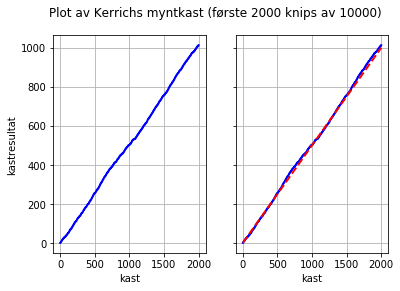

In [2]:
from matplotlib.pyplot import * 

#Importer Kerrichs liste av myntkast (fra Wikipediartikkelen)
kerrichlist =[int(i) for i in list("00011101001111101000110101111000100111001000001110 00101010100100001001100010000111010100010000101101 01110100001101001010000011111011111001101100101011 01010000011000111001111101101010110100110110110110 01111100001110110001010010000010100111111011101011 10001100011000110001100110100100001000011101111000 11111110000000001101011010011111011110010010101100 11101101110010000010001100101100111110100111100010 00001001101011101010110011111011001000001101011111 11010001111110010111111001110011111111010000100000 00001111100101010111100001110111001000110100001111 11000101001111111101101110110111011010010110110011 01010011011111110010111000111101111111000001001001 01001110111011011011111100000101010101010101001001 11101101110011100000001001101010011001000100001100 10111100010011010110110111001101001010100000010000 00001011001101011011111000101100101000011100110011 11100101011010000110001001100010010001100100001001 01000011100000011101101111001110011010101101001011 01000001110110100010001110010011100001010000000010 10010001011000010010100011111101101111010101010000 01100010100000100000000010000001100100011011101010 11011000110111010110010010111000101101101010110110 00001011011101010101000011100111000110100111011101 10001101110000010011110001110100001010000111110100 00111111111111010101001001100010111100101010001111 11000110101010011010010111110000111011110110011001 11111010000011101010111101101011100001000101101001 10011010000101111101111010110011011110000010110010 00110110101111101011100101001101100100011000011000 01010011000110100111010000011001100011101011100001 11010111011110101101101111001111011100011011010000 01011110100111011001001110001111011000011110011111 01101011101110011011100011001111001011101010010010 10100011010111011000111110000011000000010011101011 10001011101000101111110111000001111111011000000010 10111111011100010000110000110001111101001110110000 00001111011100011101010001011000110111010001110111 10000010000110100000101000010101000101100010111100 00101110010111010010110010110100011000001110000111".replace(" ",""))]
antall_mynt =[]
for i in range(len(kerrichlist)):
    antall_mynt.append(sum(kerrichlist[0:i]))

#Plotting   
x = range(1,len(kerrichlist)+1)   # Lager 'x-aksen'
y = [i/2 for i in x]

fig, (s1, s2) = subplots(1,2,sharey=True)
fig.suptitle('Plot av Kerrichs myntkast (første 2000 knips av 10000)')
s1.plot(x, antall_mynt, 'b-')   # Plott Kerrichs resultater
s1.set(ylabel ='kastresultat', xlabel = 'kast')
s2.plot(x, antall_mynt, 'b-')   # Plott Kerrichs resultater
s2.plot(x,y, 'r--')
s2.set(xlabel='kast')

Resultatene ser jo bra ut i diagrammen men vi ser noen steder hvor den grafen avviker mer eller mindre fra den perfekte linjen (rød stiplet på høyre diagram). Den linjen beskriver at vi har akkurat fått halvparten mynt. 

Etter $2000$ mynt kast hadde Kerrich fått $1014$ ganger mynt. 
Totalt har Kerrich knipset mynten sin $10000$ ganger og fått $5067$ mynt. 

Hva er egentlig betydning til det? Er det et bra resultat og i tråd med det vi har som forventningsverdien?

Hvis vi sier $X_{N}$ er en tilfeldig variabel som gir oss antall av mynter når vi knipser en (fair) mynt $N$ ganger så vet vi (hvorfor???) at forventningsverdien er $\mathbb{E}(X_N)= N\cdot 0.5$. Dvs. vi får 
$$\mathbb{E}(X_{2000}) = 0.5 \cdot 2000 = 1000 \quad \text{, og}$$
$$\mathbb{E}(X_{10000}) = 0.5 \cdot 10000 = 5000.$$
Så vi ser at Kerrichs resultater $1014$ og $5067$ avviker med $14$ og $67$ mer mynt enn forvented fra de teoretiske resultater.

Hvis vi knipser mynt oftere er avviken fra 50/50 potensiell større når vi ser på absolute tall. Vitsen er at vi må se på relative tall (det har vi gjort i det siste når vi så på løpende gjennomsnitt).

I stedet av $X_{N}$ må vi se på gjennomsnittvariablen 
$$\overline{X}_{N} = X_{N} / N$$

**Oppgave:** Forklar hvorfor variablen $\overline{X}_{N}$ er en gjennomsnitt og beregn forventningsverdien til $\overline{X}_N$.

**Plass for dine notater, dobbeltklikk for å skrive noe**

Hvis vi ser nå istedet av den absulte avviken på den *relvative avviken*, dvs. 
$$\text{relativ avvik for } 2000 = \frac{|1014-\mathbb{E}(X_{2000})|}{2000} = 0.007$$
$$\text{relativ avvik for } 10000 = \frac{|5067-\mathbb{E}(X_{10000})|}{10000} = 0.0067$$
så minker avviken (selv om det skjer veldig langsomt). Dette er innholden av (den enkleste versjonen av den store talls lov

### Store talls lov (Jacob Bernoulli, 1713)

Store talls loven er et teorem som beskriver resultatet av å utføre det samme eksperimentet et stort antall ganger. I følge loven skal gjennomsnittet av resultatene fra et stort antall forsøk være nær forventet verdi og har en tendens til å bli nærmere forventet verdi etter hvert som flere forsøk utføres.
![](https://www.mn.uio.no/ibv/tjenester/kunnskap/plantefys/leksikon/m/frimerkebernoulli2.jpg)

Dvs. antar at $X_1,X_2, X_3, \ldots$ er tilfeldige variabler som modellerer alle ett binomial forsøk med suksesssannsynlighet $p$. Vi definerer gjennomsnittvariablen
$$\overline{S}_N = \frac{1}{N} (X_1 + X_2 + X_3 + \cdots + X_N) = \frac{1}{N} \sum_{k=1}^N X_k$$
Så gjelder at sannsynligheten at verdiene av $\overline{S}_N$ avviker mer enn en gitt distanse $r$ fra forventningsverdien $\mathbb{E}(X_1) = p$ nærmerer seg $0$ når $N$ løper mot uendelig. Hvis dere fortrekker formeler kan vi skrive det som 

$$P\left(|\overline{S}_N - \mathbb{E}(X_1)|> r\right) \rightarrow 0 \text{ hvis } N \rightarrow \infty$$

**Veldig viktig**: Det kan ta en lang tid før den gjennomsnittsvariablen kommer seg nær til forventningsverdien (i Kerrichs eksperiment har vi sett en relativ liten forskjell mellom $2000$ og $10000$ mynt knips. 

Vi gjør oppmerksom at det er en grunn hvorfor det heter **STORE** *talls lov*. Det fins ingen lite talls lov (dere vil se på noen typiske mistolkninger i de ukentlige oppgaver).

### Store talls lov (generell)

Jacob Bernoulli sin lov er bare den enkleste form av den store talls lov. Faktisk gjelder det ikke bare for binomisk fordelte variabler men for alle typer av tilfeldige variabler. På en måte knytter den store talls loven sannsynlighetsteori og statistikk sammen fordi vi kan finne ut forventningsverdier vi ikke kjenner (fordi vi kjenner ikke fordelingen til den tilfeldige variabelen) ved hjelp av eksperimenter.

## Varians og standardavvik 
<a class="anchor" id="sec3_stdev"></a>

I denne avsnitt skal vi lære om varians og standardavvik av en stokastisk variabel. Disse to konsepter er liknende til spredningsmål vi lærte om i statistikk.

Variansen til en stokastiske variabel er et mål på hvor mye verdien til denne variabelen vil variere hvis man gjentar det underliggende stokastiske forsøket ganske mange ganger. 
Vi tar inspirasjon fra statistikk:

### Varians i statistikk

#### I statistikk er variansen definert som (trekk pusten!) summen av kvadratet av hver observasjons avstand fra gjennomsnittet dividert med det totale antallet observasjoner.

#### Hvordan finne varians ( i statistikk) ?
Steg for steg finner vi den ved å:

1. Regne ut gjennomsnittet $\overline{x}$.
2. Regne ut forskjellene mellom gjennomsnittet og hvert av tallene $x_i$.
3. Kvadrere forskjellene $(x_i - \overline{x})^2$.
4. Summere kvadratene av forskjellene $\sum_{i=1}^{n} (x_i - \overline{x})^2$.
5. Dividere summen med det totale antallet observasjoner  $\frac1n \sum_{i=1}^{n} (x_i - \overline{x})^2$.














### Varians for en stokastisk variabel $X$

Istedet av observasjoner i statistikk har vi nå en stokastisk variabel. Vi har allerede lært at gjennomsnitt tilsvarer forventningsverdi. Dermed kan vi bruke forventningsverdi istedet av gjennomsnitt i utregninger. 
Formelen for varians av en stokastisk variabel blir da

$$\text{Var} (X) = \mathbb{E}((X-\mathbb{E}(X))^2)=\sum_{i=1}^n (x_i - \mathbb{E}(X))^2 P(X=x_i)$$

Istedet av Var$(X)$ skriver man også ofte $\sigma^2$ i litteraturen om man ønsker å snakke om varians.

#### Tolkning av varians

Verdien til variansen har ikke en like klar tolkning som for forventningsverdien. Variansen er et mål på hvor mye observert verdi for $X$  vil variere dersom man gjentar det stokastiske forsøket som den stokastiske variabelen $X$ er definert ut fra. Dersom man for to stokastiske variabler $X$ og $Y$ har at Var$(X)>$Var$(Y)$ vil altså verdien til $Y$ variere mindre enn verdien til $X$.

### Standardavvik av $X$
Er definert som kvadratrot av varians. Dermed
$$\sigma = \text{Std}(X)=\sqrt{\text{Var}(X)}$$
Det gjør litt mer forståelig hvorfor man betegner varians med symbolet $\sigma^2$.

### Eksempel: Kast av en terning

La igjen  $X=$ antall av øyne ved kast av en terning. Vi vet allerede at $\mathbb{E}(X)=3.5$ og $P(X=x_i)=\frac16$.
Dermed gir formelen 

$$\sigma^2 =\text{Var}(X)=(1-3.5)\frac16 + (2-3.5)^2\frac{1}{6}+(3-3.5)^2\frac{1}{6}+(4-3.5)^2\frac{1}{6}+(5-3.5)^2\frac{1}{6}+(6-3.5)^2\frac{1}{6} =2.92$$

Kvadratrot gir oss nå standardavvik $\sigma=\sqrt{2.92}=1.7$

### Oppgave

Tabellen under viser prognosen for fraværet i en klasse i en periode. La $X=$antall dager fravær i denne perioden.

| x   | 0   | 1 | 2 | 3 | 4
| --- | --- | --- |---|---|---
| P(X=x) | 0.3 | 0.4| 0.2 | 0.05 | 0.05

Finn forvented antall dager fravær i denne klassen i perioden. Finn variansen og standardavvikket.